# SIR MODEL

## SIMPLE MODEL

In [2]:
import numpy as np
from scipy.integrate import odeint, simps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

%matplotlib inline

The R_0 (reproduction number) is 4.00.
There will be an epidemic outbreak: True
The number of infected is: 745,869,804
The number of deaths is: 7,458,698
The max number of infected at t: 15,828,779


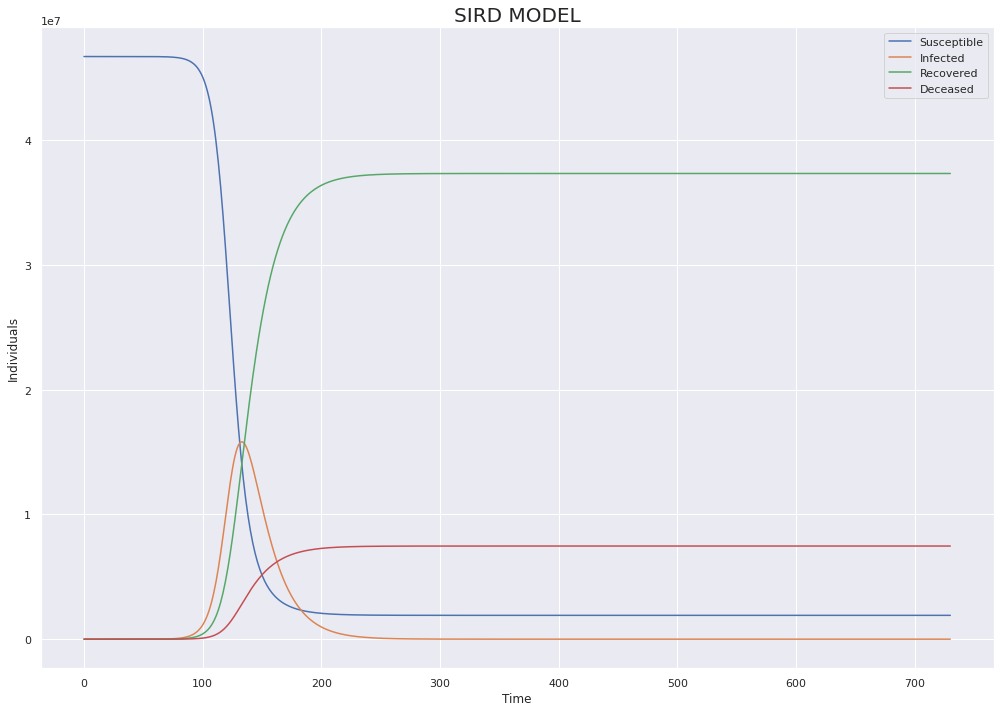

In [7]:
# Total population, N.
N = 46723749
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0, D0 = 1, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
R0 = 4
T_r = 20


T_c = T_r / R0

beta = T_c ** (-1)
gamma = T_r ** (-1)

omega = 0.01
# A grid of time points (in days)
t = np.linspace(0, 730, 730)

# The SIR model differential equations.


def deriv(y, t, N, beta, gamma, omega):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - omega * I
    dRdt = gamma * I
    dDdt = omega * I
    return dSdt, dIdt, dRdt, dDdt


reprod_number = beta / gamma

print(f"The R_0 (reproduction number) is {reprod_number:.2f}.")
print(f"There will be an epidemic outbreak: {reprod_number > N/S0}")


# Initial conditions vector
y0 = S0, I0, R0, D0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, omega))
S, I, R, D = ret.T

deaths = omega * I
infected = np.diff(I)
total_infected = simps(I)
max_infected = I.max()

print(f"The number of infected is: {total_infected:,.0f}")
print("The number of deaths is: {:,.0f}".format(np.sum(deaths)))
print("The max number of infected at t: {:,.0f}".format(max_infected))



fig, ax = plt.subplots(1, 1, figsize=(14,10))
plt.plot(t, S, label="Susceptible")
plt.plot(t, I, label="Infected")
plt.plot(t, R, label="Recovered")
plt.plot(t, D, label="Deceased")
plt.title("SIRD MODEL", fontsize=20)
ax.set_ylabel("Individuals")
ax.set_xlabel("Time")
plt.legend()
plt.tight_layout()

In [20]:
var_infected = np.diff(I)
new_infected = var_infected[var_infected > 0]
simps(new_infected)

7167790.723935238

In [23]:
simps(var_infected)

257.752227447927

## MODEL WITH VITAL DYNAMICS

The R_0 (reproduction number) is 1.63.
The number of deaths due to disease is 7 
The number of deaths due to disease is 7 (calculated from the temporal serie)
The model predicts for today 2.500669303968924 deaths.
The model predicts for today 125.0334651984462 infecteds.


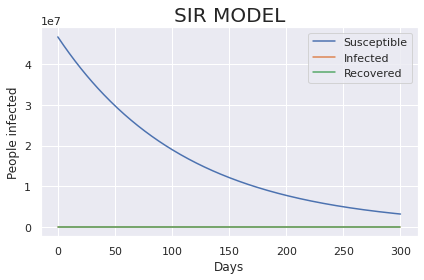

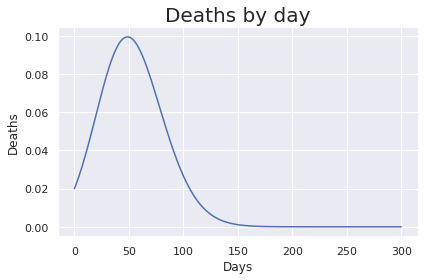

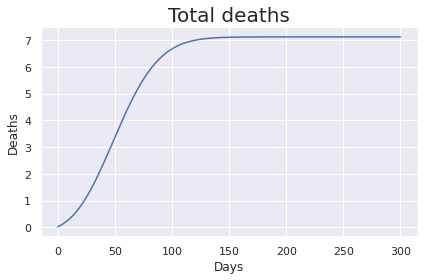

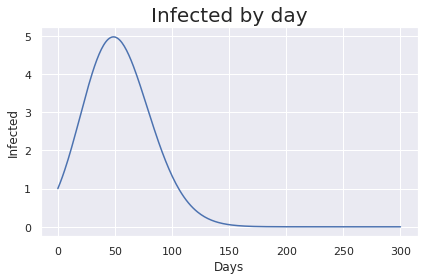

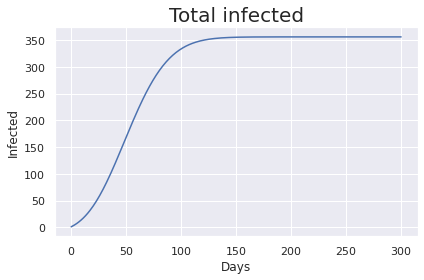

In [5]:
# MODEL WITH DYNAMICS AND EQUATIONS DIVIDED BY N

# Total population, N.
N = 46723749
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# T_c tiempo en dias entre contactos, T_r tiempo en dias de recuperacion
T_c = 5
T_r = 10

beta = T_c ** (-1)
gamma = T_r ** (-1)

# Other parameteres: alpha (birth rate), mu (death rate), omega (death rate due to disease)
alpha, mu, omega = 0.008, 0.009, 0.02
#alpha, mu, omega = 0, 0, 0 # si no hay naciemientos ni muertos

# A grid of time points (in days)
t = np.linspace(0, 300, 300)


def deriv_2(y, t, beta, gamma, alpha, mu, omega):
    S, I, R = y
    dSdt = alpha - mu * S - beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I - omega * I
    dRdt = gamma * I - mu * R
    return dSdt, dIdt, dRdt


# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv_2, y0, t, args=(beta, gamma, alpha, mu, omega))
S, I, R = ret.T

# series temporales
deaths = I * omega  # number of deaths by day
deaths_cum = np.cumsum(deaths)  # total deaths by day
infected_cum = np.cumsum(I)

# datos finales de la epidemia
reprod_number = (beta * alpha) / (mu * (mu + gamma))
total_death_disease = np.sum(I * omega)  # total number of deaths
check_total_deaths = simps(deaths)

actual_day = 41

print(f"The R_0 (reproduction number) is {reprod_number:.2f}.")
print(f"The number of deaths due to disease is {total_death_disease:,.0f} ")
print(
    f"The number of deaths due to disease is {check_total_deaths:,.0f} (calculated from the temporal serie)"
)
print(f"The model predicts for today {deaths_cum[actual_day]} deaths.")
print(f"The model predicts for today {infected_cum[actual_day]} infecteds.")


fig, ax = plt.subplots(1, 1)
plt.plot(t, S, label="Susceptible")
plt.plot(t, I, label="Infected")
plt.plot(t, R, label="Recovered")
plt.title("SIR MODEL", fontsize=20)
ax.set_ylabel("People infected")
ax.set_xlabel("Days")
plt.legend()
plt.tight_layout()


fig, ax = plt.subplots(1, 1)
plt.plot(t, deaths)
plt.title("Deaths by day", fontsize=20)
ax.set_ylabel("Deaths")
ax.set_xlabel("Days")
plt.tight_layout()


fig, ax = plt.subplots(1, 1)
plt.plot(t, deaths_cum)
plt.title("Total deaths", fontsize=20)
ax.set_ylabel("Deaths")
ax.set_xlabel("Days")
plt.tight_layout()


fig, ax = plt.subplots(1, 1)
plt.plot(t, I)
plt.title("Infected by day", fontsize=20)
ax.set_ylabel("Infected")
ax.set_xlabel("Days")
plt.tight_layout()


fig, ax = plt.subplots(1, 1)
plt.plot(t, infected_cum)
plt.title("Total infected", fontsize=20)
ax.set_ylabel("Infected")
ax.set_xlabel("Days")
plt.tight_layout()

Observo que cuando el ratio de reproducción es bajo no hay muchos muertos. Al aumentar la cosa de descontrola exponencialmente...

## INTERACTION BETWEEN MODELS

In [6]:
pd.set_option("display.max_rows", None)

En OD, tenemos la matriz de destino origen, cuantas personas viajan del pais i al j.

In [7]:
OD = np.load("/Users/agm/Documents/KSchool/TFM/data_out/od_matrix.npy")
OD.shape

FileNotFoundError: [Errno 2] No such file or directory: '/Users/agm/Documents/KSchool/TFM/data_out/od_matrix.npy'

In [ ]:
df = pd.read_pickle(
    "/Users/agm/Documents/KSchool/TFM/data_out/fulldataset_agm_rev1.gpickle"
)
df.head()

In [ ]:
df.iloc[168]

In [ ]:
df.isna().sum()

¿De que paises no tenemos la población?

In [ ]:
df.loc[df['population'].isna()]

In [ ]:
df.shape

In [ ]:
df.loc[df["country_code"] == "ESP"]

Este es el número de personas que llegan a Afganistan al dia.

In [ ]:
OD[:, 39].sum()

Este es el número de personas que cogen un avión desde Afganistan al día.

In [ ]:
OD[39, :].sum()

Compruebo que los núemros cuadran para todos los países.

In [ ]:
country_code = "ESP"
index = df.loc[df["country_code"] == country_code].index.item()

print(
    "The number of departures/day from {} is {:.0f}".format(
        df.loc[df["country_code"] == country_code, "country_name"].item(),
        df.loc[df["country_code"] == country_code, "departures"].item() / 365,
    )
)

print(
    "(OD) The number of departures/day from {} is {}".format(
        df.loc[df["country_code"] == country_code, "country_name"].item(),
        OD[index, :].sum(),
    )
)

La diferencia que hay entre los dos numeros es porque a la hora de hacer la proporcion he redondeado para que salgan numero enteros.

### SIR MODELLING

La población de cada país.

In [ ]:
N_k = df['population'].values

In [ ]:
N_k.shape

In [ ]:
print("Population from {} is {} people".format(country_code, N_k[index]))

In [ ]:
locs_len = len(N_k)
print(f"We have {locs_len} locations")

In [ ]:
SIR = np.zeros(shape=(locs_len, 3))
SIR.shape

Asignamos a S, la población total, toda la población está en suscepctible.

In [ ]:
SIR[:, 0] = N_k

In [ ]:
SIR[:10, :]

Sumo las tres poblaciones de cada pais, tendría que ser igual a la población total del país:

In [ ]:
row_sums = SIR.sum(axis=1)
row_sums[:10]

Introduzco infectados en el modelo:

In [ ]:
country_code = "ESP"
idx_country = df.loc[df["country_code"] == country_code].index.item()
number_infected = 1000

SIR[idx_country, 1] += number_infected
SIR[idx_country, 0] -= number_infected

print(f"The index of the country is {idx_country}")
SIR[idx_country]

Divido cada elemento de la matriz SIR entre la población total de ese país para saber la proporcion en cada uno de los tres estados.

In [ ]:
row_sums[:].shape

In [ ]:
row_sums[:, np.newaxis].shape

In [ ]:
row_sums.reshape(-1, 1).shape

In [ ]:
row_sums[:, np.newaxis].shape == row_sums[:].reshape(-1, 1).shape

In [ ]:
SIR_prop = SIR / row_sums.reshape(-1, 1)
SIR_prop[:10, :]

In [ ]:
SIR_prop[idx_country]

>Vemos como el 100 % de la población ahora mismo esta en S, menos en el pais donde ha empezado la propagación.

Defino los parametros:

In [ ]:
T_c = 0.5
T_r = 10
beta = T_c ** (-1)
gamma = T_r ** (-1)
R0 = beta / gamma
# beta_v = np.random.gamma(1.6, 2, locs_len) # aqui utiliza una distribucion para beta
beta_v = np.full(locs_len, beta)
gamma_v = np.full(locs_len, gamma)

En beta_v y gamma_v tengo los parametros beta y gamma para cada ciudad.

In [ ]:
beta_v.shape, gamma_v.shape

Introduzco infectados en el modelo:

Hago una copia de la matriz SIR.

In [ ]:
SIR_sim = SIR.copy()
SIR_propsim = SIR_prop.copy()  # SIR_nsim

Comprobamos que la población total está dentro de la matriz SIR:

In [ ]:
print(int(SIR_sim.sum(axis=0).sum()) == int(N_k.sum()))

Esto sería la población que hay en cada estado, a nivel mundial:

In [ ]:
SIR_sim.sum(axis=0)

Ejecutamos el modelo:

Repaso broadcasting:

In [ ]:
a = beta_v
b = SIR_sim[:, 0]
c = a*b

print(a.shape, b.shape, c.shape)

In [ ]:
a = np.array([1,2,3,4]).T
b = np.array([5,6,7,8]).T

In [ ]:
a.shape, b.shape

In [ ]:
a * b

In [ ]:
susceptible_pop = []
infected_pop = []
recovered_pop = []

susceptible_pop_norm = []
infected_pop_norm = []
recovered_pop_norm = []

T = 200

SIR_t = np.zeros((locs_len, 3, T))

for t in range(T):
    # infected_mat(n,n) (i,j)=(i,j+1)=... numero de infectados en el pais i
    infected_mat = np.array([SIR_propsim[:, 1], ]*locs_len).T
    # OD_infected (n,n) i,j numero de infectados que van de i a j.
    # Podría redondear, pero si el numero de infectados inicial es muy bajo, será toda la matriz de 0
    OD_infected = OD*infected_mat
    # inflow_infected (n) i, número de infectados que llegan a i.
    inflow_infected = OD_infected.sum(axis=0)
    # numero todal de infectados que se mueven en el periodo t
    #print("Total infected flow: {}.".format(inflow_infected.sum()))
    # aqui se utiliza broadcasting para las operaciones vectoriales...
    # new_infect (n,1) i, número de nuevos infectados
    new_infect = beta_v*SIR_sim[:, 0] * \
        inflow_infected/(N_k + OD.sum(axis=0))
    # new_recovered (n, 1) i, número de recuperados en el país i
    new_recovered = gamma_v*SIR_sim[:, 1]
    # si el numero de nuevos infectados es mayor al numero de susceptibles, el numero de nuevos infectados es el numero de susceptibles
    # si no, es el nuevo que ha habíamos calculado de nuevos infectados
    new_infect = np.where(
        new_infect > SIR_sim[:, 0], SIR_sim[:, 0], new_infect)
    # actualizaro la matriz SIR
    SIR_sim[:, 0] = SIR_sim[:, 0] - new_infect
    SIR_sim[:, 1] = SIR_sim[:, 1] + new_infect - new_recovered
    SIR_sim[:, 2] = SIR_sim[:, 2] + new_recovered
    # evito que haya valores negativos
    SIR_sim = np.where(SIR_sim < 0, 0, SIR_sim)
    # calculo la matriz SIR en porcentajes
    row_sums = SIR_sim.sum(axis=1)
    SIR_propsim = SIR_sim / row_sums.reshape(-1, 1)
    # calculo la población en cada grupo
    S = SIR_sim[:, 0].sum()
    I = SIR_sim[:, 1].sum()
    R = SIR_sim[:, 2].sum()
    # calculo las proporciones para cada grupo, son proporciones mundiales
    S_p = SIR_sim[:, 0].sum()/N_k.sum()
    I_p = SIR_sim[:, 1].sum()/N_k.sum()
    R_p = SIR_sim[:, 2].sum()/N_k.sum()
    # compruebo que el balance de proporciones es correcto
    #print(S, I, R, int((S+I+R)*N_k.sum()) == int(N_k.sum()), '\n=====')
    susceptible_pop.append(S)
    infected_pop.append(I)
    recovered_pop.append(R)
    susceptible_pop_norm.append(S_p)
    infected_pop_norm.append(I_p)
    recovered_pop_norm.append(R_p)
    SIR_t[:,:,t] = SIR_sim

print('infected_mat: {}'.format(infected_mat.shape))
print('OD_infected: {}'.format(OD_infected.shape))
print('inflow_infected: {}'.format(inflow_infected.shape))
print('new_infect: {}'.format(new_infect.shape))
print('new_recovered: {}'.format(new_recovered.shape))
print('new_infect: {}'.format(new_infect.shape))
print('SIR_sim: {}'.format(SIR_sim.shape))
print('S: {}'.format(S.shape))
print('I: {}'.format(I.shape))
print('R: {}'.format(R.shape))
print('Reproduction number: {}'.format(R0))

In [ ]:
fig, ax = plt.subplots(1, 1)
plt.plot(np.array(range(T)), susceptible_pop_norm, label="Susceptible")
plt.plot(np.array(range(T)), infected_pop_norm, label="Infected")
plt.plot(np.array(range(T)), recovered_pop_norm, label="Recovered")
plt.title("SIR MODEL", fontsize=20)
ax.set_ylabel("People infected")
ax.set_xlabel("Days")
plt.legend()
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(1, 1)
plt.plot(np.cumsum(infected_pop))
plt.tight_layout()

In [ ]:
SIR_t.shape

In [ ]:
fig, ax = plt.subplots(1, 1)
plt.plot(SIR_t[168,1,:])
plt.tight_layout()

## SIR WITH DIFFERENT POPULATIONS

In [ ]:
pop = [100, 1000, 10000]

for i in pop:
    # Total population, N.
    N = i
    # Initial number of infected and recovered individuals, I0 and R0.
    I0, R0 = 1, 0
    # Everyone else, S0, is susceptible to infection initially.
    S0 = N - I0 - R0
    # Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
    T_c = 2
    T_r = 20

    beta = T_c ** (-1)
    gamma = T_r ** (-1)
    # A grid of time points (in days)
    t = np.linspace(0, 300, 300)

    # The SIR model differential equations.


    def deriv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt


    reprod_number = beta / gamma


    print(f"The R_0 (reproduction number) is {reprod_number:.2f}.")
    print(f"There will be an epidemic outbreak: {reprod_number > N/S0}")


    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T

    fig, ax = plt.subplots(1, 1)

    plt.plot(t, S, label="Susceptible")
    plt.plot(t, I, label="Infected")
    plt.plot(t, R, label="Recovered")

    plt.title("SIR MODEL", fontsize=20)
    ax.set_ylabel("People infected")
    ax.set_xlabel("Days")
    plt.legend()
    plt.tight_layout()
